# Heart failure prediction

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte en todo el mundo y se cobran aproximadamente 17,9 millones de vidas cada año, lo que representa el 31 % de todas las muertes en todo el mundo. Sin embargo, estas se pueden prevenir considerando diversas estrategias contra los factores de riesgo como el tabaquismo, dieta poco saludable, inactividad física y consumo de alcohol. 
El objetivo de analizar el dataset Heart Failure Prediction es comprender y predecir la incidencia de insuficiencia cardíaca en pacientes a partir de variables clínicas y demográficas. La insuficiencia cardíaca es una condición médica crítica en la que el corazón no puede bombear suficiente sangre lo que puede ocasionar complicaciones graves en el organismo e incluso la muerte.

Dataset: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

Algunas preguntas son las siguientes:                                                                                             
¿Cuáles son las variables que tienen una mayor influencia en la predicción de la insuficiencia cardíaca?
¿Qué variables están altamente correlacionadas entre sí y cómo afecta esto a la predicción?
¿Cuál es la proporción de casos positivos (insuficiencia cardíaca) frente a casos negativos (no insuficiencia cardíaca)? 
¿Cómo se puede mejorar el modelo para lograr una mayor precisión y recall en la detección de casos de insuficiencia cardíaca?

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("heart_failure.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  death_event               299 non-null    object 
dtypes: float64

In [ ]:
data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870,0.32107
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208,0.46767
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000,0.00000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000,0.00000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000,0.00000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000,1.00000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000,1.00000


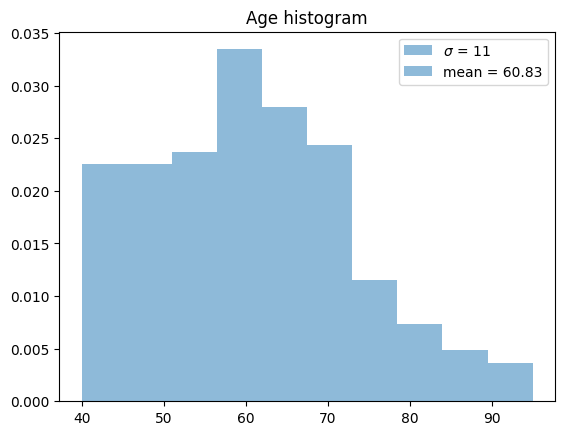

In [ ]:
plt.hist(data.age, label='Age', density=True, alpha=.5)
std = data.age.std()
mean = data.age.mean()
plt.legend(["${\sigma}$ = %d"%std , f"mean = {mean:.2f}"])
plt.title("Age histogram")
plt.show()

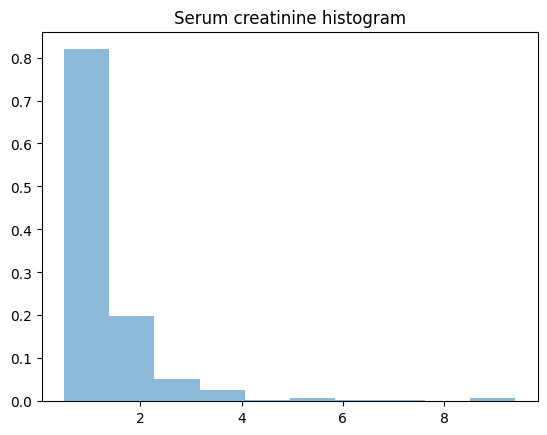

In [ ]:
plt.hist(data.serum_creatinine, label='Serum creatinine', density=True, alpha=.5)
plt.title("Serum creatinine histogram")
plt.show()

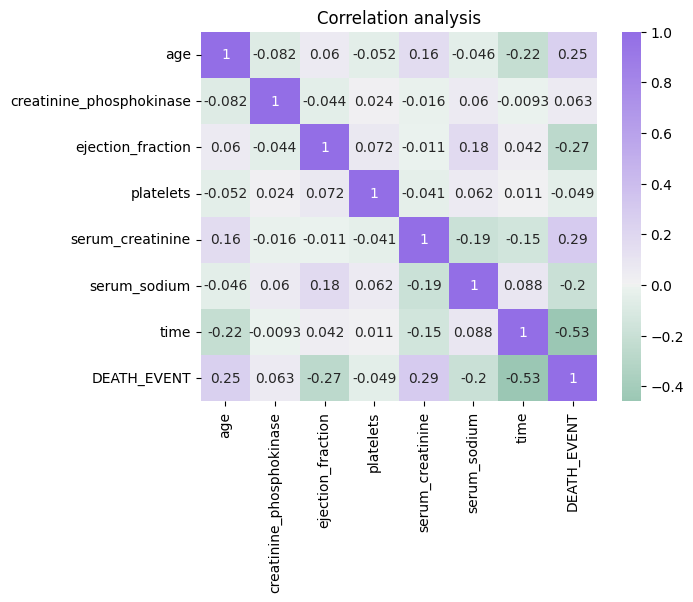

In [ ]:
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(data.corr(), center=0, cmap=colors, robust=True,annot=True)
plt.title("Correlation analysis")
plt.show()

In [ ]:
print('Classes and number of values in the dataset',Counter(data['death_event']))

Classes and number of values in the dataset Counter({'no': 203, 'yes': 96})


In [ ]:
y = data['death_event']
x = data[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]

### Data preprocessing

In [ ]:
my_features = pd.get_dummies(x)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [ ]:
ct = ColumnTransformer([("numeric", StandardScaler(), ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time'])])

In [ ]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

### Prepare labels for classification

In [ ]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train.astype(str))

In [ ]:
Y_test = le.transform(Y_test.astype(str))

In [ ]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

### Model

In [ ]:
model = Sequential()

2023-08-06 16:31:14.574997: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-06 16:31:14.575035: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-06 16:31:14.575054: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-e15dcbf6-fbe3-4a5b-9a14-242e6333a6f4): /proc/driver/nvidia/version does not exist
2023-08-06 16:31:14.575308: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.add(InputLayer(input_shape=(X_train.shape[1],)))

In [ ]:
model.add(Dense(12, activation='relu'))

In [ ]:
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### Train and evaluate the model

In [ ]:
model.fit(X_train, Y_train, epochs = 50, batch_size = 2, verbose=1)

Epoch 1/50
105/105 [==============================] - 1s 2ms/step - loss: 0.7721 - accuracy: 0.5407
Epoch 2/50
105/105 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.6364
Epoch 3/50
105/105 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.6603
Epoch 4/50
105/105 [==============================] - 0s 1ms/step - loss: 0.5591 - accuracy: 0.7081
Epoch 5/50
105/105 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.7273
Epoch 6/50
105/105 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7608
Epoch 7/50
105/105 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.7847
Epoch 8/50
105/105 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.7847
Epoch 9/50
105/105 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8038
Epoch 10/50
105/105 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8230

In [ ]:
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print("Loss", loss, "Accuracy:", acc)

Loss 0.4204486906528473 Accuracy: 0.8666666746139526


### Classification report

In [ ]:
y_probabilities = model.predict(X_test)  
y_estimate = (y_probabilities >= 0.5).astype(int)
y_true = Y_test

print(classification_report(y_true, y_estimate))

3/3 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        62
           1       0.86      0.68      0.76        28

   micro avg       0.87      0.87      0.87        90
   macro avg       0.87      0.82      0.83        90
weighted avg       0.87      0.87      0.86        90
 samples avg       0.87      0.87      0.87        90



Los resultados del informe de clasificación indican el rendimiento del modelo para cada clase y un resumen general de su desempeño en todo el conjunto de datos. Para la clase 0 (no insuficiencia cardiaca) se tiene una precisión de 87% para predecir correctamente los casos negativos (personas sin insuficiencia cardiaca). Además, el recall es del 95%, lo que indica que el modelo logra capturar el 95% de las personas que no tendrán insuficiencia cardíaca. En tanto, para la clase 1 (insuficiencia cardiaca) el modelo tiene una precisión del 86%;sin embargo, el recall es del 68% lo que indica que el modelo no logra capturar todos los casos de insuficiencia cardíaca, dejando un margen de mejora en la detección de los casos positivos.

En general, el modelo muestra un buen rendimiento para predecir casos negativos (no insuficiencia cardíaca) con una alta precisión y recall. Sin embargo, para predecir casos positivos (insuficiencia cardíaca), el recall es más bajo, lo que sugiere que el modelo puede beneficiarse de ajustes para mejorar la detección de los casos de insuficiencia cardíaca.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e15dcbf6-fbe3-4a5b-9a14-242e6333a6f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>